In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
InvTrsct=pd.read_csv("/content/drive/MyDrive/combined_trsct (3).csv")

In [ ]:
InvTrsct=InvTrsct.drop(columns=['Account Name', 'Item Amount'])

In [ ]:
InvTrsct = InvTrsct[~InvTrsct['Client Segment Type'].str.contains('Tech', na=False)]

In [ ]:
InvTrsct = InvTrsct[InvTrsct['Respondent_Cleaned'] == 'Consumer']

In [ ]:
InvTrsct.head()

,Client Segment Type,Respondent_Cleaned,Account Owner,Qty,IR,LOI,Customer Rate,Label
0,One Stop Shopper,Consumer,Courtney Hocking,1000.0,88.888889,2.320037,5.46,1
1,One Stop Shopper,Consumer,Whitney Giordano,505.0,92.153285,2.499800,2.00,1
2,Blender,Consumer,Whitney Giordano,5.0,1.351351,2.817495,30.00,1
3,Undefined,Consumer,NaN,250.0,81.967213,3.120906,5.00,1
4,Automater,Consumer,Courtney Hocking,61.0,67.777778,3.768564,7.00,1


In [ ]:
InvTrsct = InvTrsct.drop(columns=['Respondent_Cleaned'])

In [ ]:
# One-hot encode 'Client Segment Type'
InvTrsct = pd.get_dummies(InvTrsct, columns=['Client Segment Type'], prefix='Client_Segment', dtype=int)

# One-hot encode 'Account Owner'
InvTrsct = pd.get_dummies(InvTrsct, columns=['Account Owner'], prefix='Account_Owner', dtype=int)

InvTrsct.head()


,Qty,IR,LOI,Customer Rate,Label,Client_Segment_Automater,Client_Segment_Blender,Client_Segment_One Stop Shopper,Client_Segment_Undefined,Account_Owner_Bud Conner,Account_Owner_Courtney Hocking,Account_Owner_Danielle Chinitz,Account_Owner_Kenneth Berry,Account_Owner_Scott Stein,Account_Owner_Whitney Giordano
0,1000.0,88.888889,2.320037,5.46,1,0,0,1,0,0,1,0,0,0,0
1,505.0,92.153285,2.499800,2.00,1,0,0,1,0,0,0,0,0,0,1
2,5.0,1.351351,2.817495,30.00,1,0,1,0,0,0,0,0,0,0,1
3,250.0,81.967213,3.120906,5.00,1,0,0,0,1,0,0,0,0,0,0
4,61.0,67.777778,3.768564,7.00,1,1,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'LOI', 'IR', and 'Qty' are columns in your InvTrsct DataFrame

# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to standardize
columns_to_scale = ['LOI', 'IR', 'Qty']

# Fit the scaler on the selected columns and transform them
InvTrsct[columns_to_scale] = scaler.fit_transform(InvTrsct[columns_to_scale])

# Print the standardized DataFrame
print(InvTrsct.head())


        Qty        IR       LOI  Customer Rate  Label  \
0  0.694259  1.927300 -2.321103           5.46      1   
1 -0.201751  2.049009 -2.288533           2.00      1   
2 -1.106811 -1.336436 -2.230973          30.00      1   
3 -0.663331  1.669233 -2.176000           5.00      1   
4 -1.005444  1.140196 -2.058657           7.00      1   

   Client_Segment_Automater  Client_Segment_Blender  \
0                         0                       0   
1                         0                       0   
2                         0                       1   
3                         0                       0   
4                         1                       0   

   Client_Segment_One Stop Shopper  Client_Segment_Undefined  \
0                                1                         0   
1                                1                         0   
2                                0                         0   
3                                0                         1   
4     

In [ ]:
InvTrsct_1 = InvTrsct[InvTrsct['Label'] == 1]

In [ ]:
InvTrsct_1 = InvTrsct_1.drop(columns=['Label'])

In [ ]:
InvTrsct_1

,Qty,IR,LOI,Customer Rate,Client_Segment_Automater,Client_Segment_Blender,Client_Segment_One Stop Shopper,Client_Segment_Undefined,Account_Owner_Bud Conner,Account_Owner_Courtney Hocking,Account_Owner_Danielle Chinitz,Account_Owner_Kenneth Berry,Account_Owner_Scott Stein,Account_Owner_Whitney Giordano
0,0.694259,1.927300,-2.321103,5.46,0,0,1,0,0,1,0,0,0,0
1,-0.201751,2.049009,-2.288533,2.00,0,0,1,0,0,0,0,0,0,1
2,-1.106811,-1.336436,-2.230973,30.00,0,1,0,0,0,0,0,0,0,1
3,-0.663331,1.669233,-2.176000,5.00,0,0,0,1,0,0,0,0,0,0
4,-1.005444,1.140196,-2.058657,7.00,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-0.790040,-0.538389,3.002291,8.00,0,1,0,0,0,0,0,0,0,1
531,-0.914938,-1.117911,3.012423,40.00,0,1,0,0,0,0,1,0,0,0
532,-0.911318,-1.048692,3.064440,40.00,0,1,0,0,0,0,1,0,0,0
533,-1.077849,-0.235407,3.226080,57.00,0,1,0,0,0,0,0,0,0,1


In [ ]:
# prompt: download InvTrsct_1 dataset

# Assuming InvTrsct_1 is already defined as in your provided code.
# If not, please include the code to generate InvTrsct_1.

# Save InvTrsct_1 to a CSV file in your Google Drive
InvTrsct_1.to_csv('/content/drive/My Drive/InvTrsct_1.csv', index=False)

# Verify the file was saved correctly
!ls -l /content/drive/My\ Drive/InvTrsct_1.csv


-rw------- 1 root root 45764 Apr 20 07:29 '/content/drive/My Drive/InvTrsct_1.csv'


Mean Squared Error: 58.38320343634923
R-squared: 0.3822647245512427


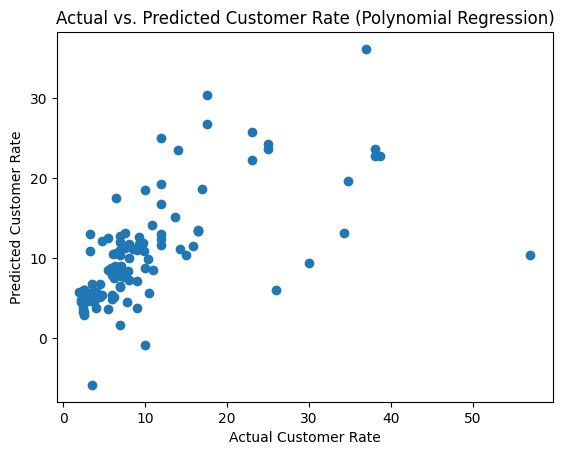

In [ ]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = InvTrsct_1.drop('Customer Rate', axis=1)  # Features
y = InvTrsct_1['Customer Rate']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Adjust test_size as needed

# Create polynomial features
poly = PolynomialFeatures(degree=2) # You can adjust the degree
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Make predictions on the test set
y_poly_pred = poly_reg.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_poly_pred)
r2 = r2_score(y_test, y_poly_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can further analyze the results, visualize the fit, etc.
# For example, you might plot the predicted vs. actual values:
plt.scatter(y_test, y_poly_pred)
plt.xlabel("Actual Customer Rate")
plt.ylabel("Predicted Customer Rate")
plt.title("Actual vs. Predicted Customer Rate (Polynomial Regression)")
plt.show()


In [ ]:
pip install --upgrade scikit-learn


Random Forest - Mean Squared Error: 47.68794958176871
Random Forest - R-squared: 0.49542801804980197


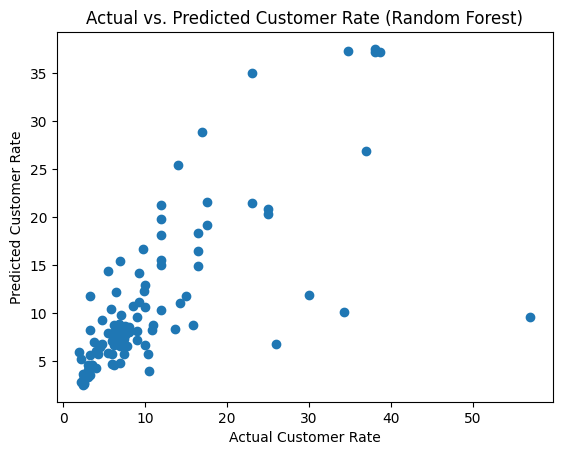

In [ ]:
# prompt: Do random forest regressor

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0) # You can adjust n_estimators

# Train the model
rf_regressor.fit(X_train, y_train) # Use original X_train, y_train

# Make predictions
y_rf_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

# Plot the predicted vs. actual values
plt.scatter(y_test, y_rf_pred)
plt.xlabel("Actual Customer Rate")
plt.ylabel("Predicted Customer Rate")
plt.title("Actual vs. Predicted Customer Rate (Random Forest)")
plt.show()


Epoch 1/66


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 203.2403 - mae: 10.7967 - val_loss: 203.3508 - val_mae: 9.3716
Epoch 2/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 126.9333 - mae: 7.3707 - val_loss: 124.4804 - val_mae: 6.6716
Epoch 3/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.2238 - mae: 4.8779 - val_loss: 92.7766 - val_mae: 5.9663
Epoch 4/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.8696 - mae: 4.4229 - val_loss: 89.5408 - val_mae: 5.8279
Epoch 5/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.9389 - mae: 4.5529 - val_loss: 89.6202 - val_mae: 5.7644
Epoch 6/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.3026 - mae: 4.4421 - val_loss: 89.7279 - val_mae: 5.6759
Epoch 7/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.5212 - mae: 3.9999 - val_loss: 88.3154 - val_mae: 5.6495
Epoch 8/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.7071 - mae: 4.5823 - val_loss: 88.8836 - val_mae: 5.6001
Epoch 9/66
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.

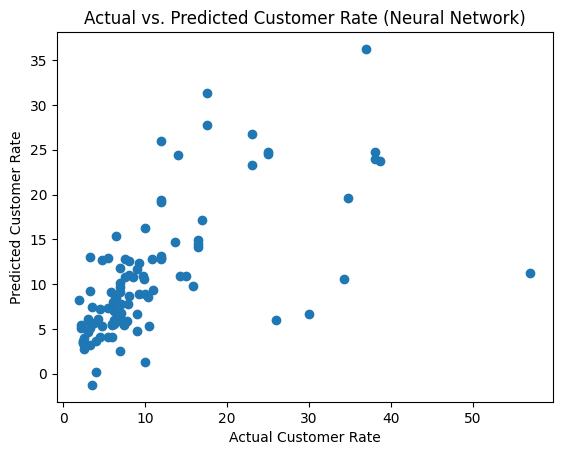

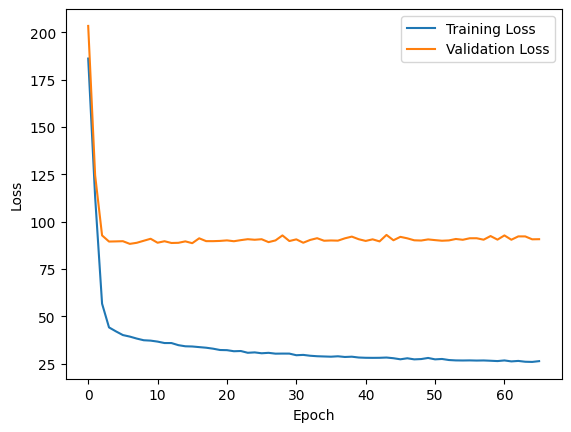

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# ... (Your existing code for data loading and preprocessing) ...

# Initialize LabelEncoder
le = LabelEncoder()


# Define features (X) and target variable (y)
X = InvTrsct_1.drop('Customer Rate', axis=1)  # Features
y = InvTrsct_1['Customer Rate']  # Target variable

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer="nadam", loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=66, batch_size=8, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred)
r2_nn = r2_score(y_test, y_pred)

print(f"Neural Network - Mean Squared Error: {mse_nn}")
print(f"Neural Network - R-squared: {r2_nn}")

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Customer Rate")
plt.ylabel("Predicted Customer Rate")
plt.title("Actual vs. Predicted Customer Rate (Neural Network)")
plt.show()

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your one-hot CSV
df = InvTrsct_1

# 2. Define X/y
X = df.drop('Customer Rate', axis=1)
y = df['Customer Rate']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Preprocessor: scale only the numeric cols
numeric_cols = ['Qty', 'IR', 'LOI']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

# 5. Pipelines + param grids
models = {
    'Ridge': {
        'pipe': Pipeline([('pre', preprocessor),
                          ('reg', Ridge())]),
        'params': {
            'reg__alpha': [0.1, 1.0, 10.0]
        }
    },
    'RandomForest': {
        'pipe': Pipeline([('pre', preprocessor),
                          ('reg', RandomForestRegressor(random_state=42, n_jobs=-1))]),
        'params': {
            'reg__n_estimators': [100, 200],
            'reg__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'pipe': Pipeline([('pre', preprocessor),
                          ('reg', XGBRegressor(
                              objective='reg:squarederror',
                              random_state=42,
                              n_jobs=-1))]),
        'params': {
            'reg__n_estimators': [50, 100],
            'reg__max_depth': [3, 6]
        }
    }
}

# 6. Grid-search each model
results = []
for name, mp in models.items():
    grid = GridSearchCV(
        mp['pipe'],
        mp['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    results.append({
        'model': name,
        'best_params': grid.best_params_,
        'rmse': rmse,
        'r2': r2
    })

# 7. Print a neat summary
print(f"{'Model':12} {'R²':>6}   {'RMSE':>6}   {'Best Params'}")
print("-" * 50)
for r in results:
    print(f"{r['model']:12} {r['r2']:6.3f}   {r['rmse']:6.3f}   {r['best_params']}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model            R²     RMSE   Best Params
--------------------------------------------------
Ridge         0.333    8.984   {'reg__alpha': 1.0}
RandomForest  0.392    8.575   {'reg__max_depth': 10, 'reg__n_estimators': 200}
XGBoost       0.189    9.904   {'reg__max_depth': 3, 'reg__n_estimators': 50}


In [ ]:

# Filter for Label == 0
InvTrsct_0 = InvTrsct[InvTrsct['Label'] == 0]

# Preprocess the data for Label == 0 (using the same preprocessing as for Label == 1)
InvTrsct_0 = InvTrsct_0.drop(columns=['Label'])

# Initialize LabelEncoder (if not already initialized)
le = LabelEncoder()



# Define features (X)
X_0 = InvTrsct_0.drop('Customer Rate', axis=1)

# Use the trained RandomForest model to predict 'Customer Rate' for Label == 0
y_rf_pred_0 = rf_regressor.predict(X_0)

# Add the predicted 'Customer Rate' to the InvTrsct_0 DataFrame
InvTrsct_0['Predicted_Customer_Rate'] = y_rf_pred_0

# Now, InvTrsct_0 contains the predicted 'Customer Rate' for Label == 0
print(InvTrsct_0.head())


          Qty        IR       LOI  Customer Rate  Client_Segment_Automater  \
536  0.332235  0.850211 -0.023729           5.75                         1   
537 -0.934850 -1.200401 -0.023729          35.00                         1   
538 -0.844344 -1.013982 -0.023729          18.00                         1   
539 -0.319408 -0.827562 -0.023729          25.00                         0   
540 -0.753838 -0.827562 -0.023729          20.00                         0   

     Client_Segment_Blender  Client_Segment_One Stop Shopper  \
536                       0                                0   
537                       0                                0   
538                       0                                0   
539                       1                                0   
540                       1                                0   

     Client_Segment_Undefined  Account_Owner_Bud Conner  \
536                         0                         1   
537                         

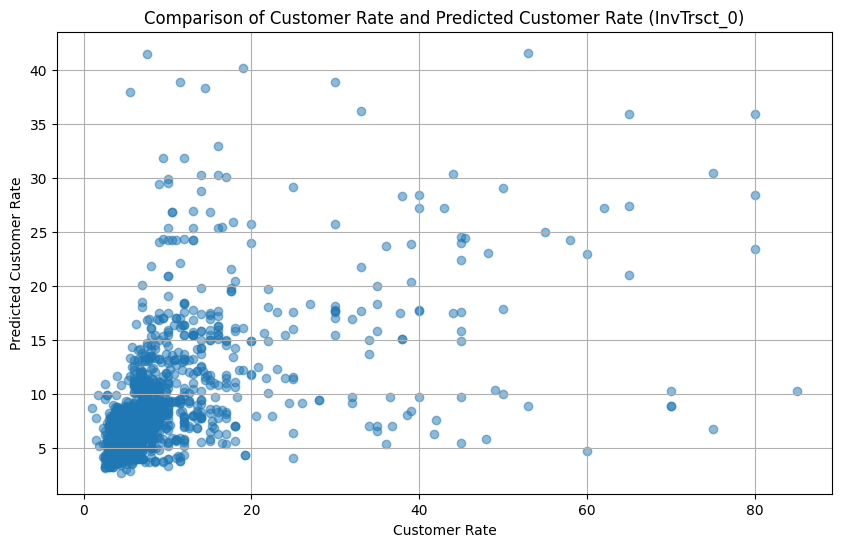

In [ ]:

import matplotlib.pyplot as plt
# Assuming 'InvTrsct_0' and 'Predicted_Customer_Rate' columns exist in the dataframe

plt.figure(figsize=(10, 6))
plt.scatter(InvTrsct_0['Customer Rate'], InvTrsct_0['Predicted_Customer_Rate'], alpha=0.5)
plt.xlabel("Customer Rate")
plt.ylabel("Predicted Customer Rate")
plt.title("Comparison of Customer Rate and Predicted Customer Rate (InvTrsct_0)")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler

# 1) Load the raw CSV and reapply your initial filters/drops
raw = pd.read_csv('/content/drive/MyDrive/combined_trsct (3).csv')
raw = raw.drop(columns=['Account Name', 'Item Amount'])
raw = raw[~raw['Client Segment Type'].str.contains('Tech', na=False)]
raw = raw[raw['Respondent_Cleaned'] == 'Consumer']
raw = raw.drop(columns=['Respondent_Cleaned'])

# 2) Keep a copy of the original details for Label == 0
raw0 = raw[raw['Label'] == 0].copy().reset_index(drop=True)

# 3) Prepare a model‑ready version by one‑hot encoding + scaling (exactly as before)
df_model = raw.copy()
df_model = pd.get_dummies(df_model,
                          columns=['Client Segment Type'],
                          prefix='Client_Segment',
                          dtype=int)
df_model = pd.get_dummies(df_model,
                          columns=['Account Owner'],
                          prefix='Account_Owner',
                          dtype=int)

scaler = StandardScaler()
df_model[['LOI', 'IR', 'Qty']] = scaler.fit_transform(df_model[['LOI', 'IR', 'Qty']])

# 4) Isolate the features for Label == 0 and drop label/target columns
X0 = df_model[df_model['Label'] == 0].drop(columns=['Label', 'Customer Rate'])

# 5) Choose your trained model (adjust if you used a grid search object)
#    If you used a grid search RF named `grid_rf`, swap in `model = grid_rf.best_estimator_`
model = rf_regressor  # or: model = grid_rf.best_estimator_

# 6) Predict and attach to the original raw0 DataFrame
raw0['Predicted_Customer_Rate'] = model.predict(X0)

# 7) Export and trigger download
raw0.to_csv('InvTrsct_0_with_predictions.csv', index=False)
files.download('InvTrsct_0_with_predictions.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler

# 1) load & filter raw data
raw = pd.read_csv('/content/drive/MyDrive/combined_trsct (3).csv')
raw = raw.drop(columns=['Account Name', 'Item Amount'])
raw = raw[~raw['Client Segment Type'].str.contains('Tech', na=False)]
raw = raw[raw['Respondent_Cleaned'] == 'Consumer']
raw = raw.drop(columns=['Respondent_Cleaned'])

# 2) keep original for Label==0
raw0 = raw[raw['Label'] == 0].copy().reset_index(drop=True)

# 3) prepare model‑ready data
df_model = raw.copy()
df_model = pd.get_dummies(df_model,
                          columns=['Client Segment Type'],
                          prefix='Client_Segment',
                          dtype=int)
df_model = pd.get_dummies(df_model,
                          columns=['Account Owner'],
                          prefix='Account_Owner',
                          dtype=int)
scaler = StandardScaler()
df_model[['LOI', 'IR', 'Qty']] = scaler.fit_transform(
    df_model[['LOI', 'IR', 'Qty']]
)

# 4) extract X0
X0 = df_model[df_model['Label'] == 0].drop(
    columns=['Label', 'Customer Rate']
)

# 5) predict
model = rf_regressor  # or: grid_rf.best_estimator_
raw0['Predicted_Customer_Rate'] = model.predict(X0)

# 6) cap any over‑predictions to the true value
raw0['Predicted_Customer_Rate'] = raw0[['Predicted_Customer_Rate', 'Customer Rate']].min(axis=1)

# 7) save & download
raw0.to_csv('InvTrsct_0_with_predictions.csv', index=False)
files.download('InvTrsct_0_with_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>